<a href="https://colab.research.google.com/github/wdoppenberg/art-deep-transfer-learning/blob/master/Plotting_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My\ Drive/Colab\ Notebooks/cs4240-project


/content/drive/.shortcut-targets-by-id/1qYhyzoN-xaPWkyz7yLQfu4Pnb8uzG43y/cs4240-project


In [0]:
DATASETS_PATH='datasets/Jap/'
CHECKPOINT_PATH = 'models/PyTorch/'

In [4]:
pip install -q -r requirements.txt

     |████████████████████████████████| 7.8MB 9.5MB/s 
     |████████████████████████████████| 61kB 9.4MB/s 


In [0]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import io
import random
import time
from numpy import asarray
from numpy import savetxt

import torch
from torchvision import models, transforms
import torch.nn as nn
from torch.optim import SGD

import h5py
import utils
from efficientnet_pytorch import EfficientNet



In [6]:
if torch.cuda.is_available():
        print(f'Using GPU: {torch.cuda.get_device_name(0)}')
else:
        print('Using CPU')

Using GPU: Tesla T4


# **Plotting**

In [0]:
colours = ['green', 'green', 'red', 'red', 'blue', 'blue']
linestyles = ['solid' ,'dashed','solid' ,'dashed','solid' ,'dashed']
pointer=0
plt.rc('font', size=12)          # controls default text sizes


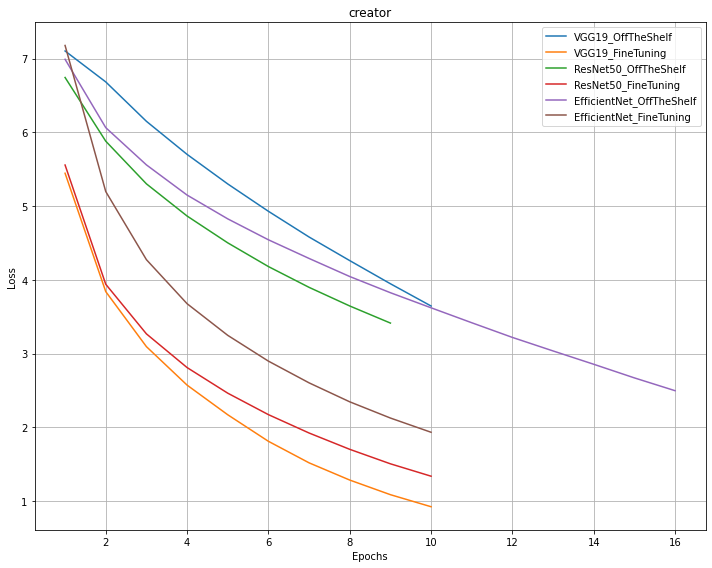

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-0685d6433169>", line 10, in <module>
    checkpoint = torch.load(CHECKPOINT_PATH_full)
  File "/usr/local/lib/python3.6/dist-packages/torch/serialization.py", line 529, in load
    return _legacy_load(opened_file, map_location, pickle_module, **pickle_load_args)
  File "/usr/local/lib/python3.6/dist-packages/torch/serialization.py", line 709, in _legacy_load
    deserialized_objects[key]._set_from_file(f, offset, f_should_read_directly)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_t

KeyboardInterrupt: ignored

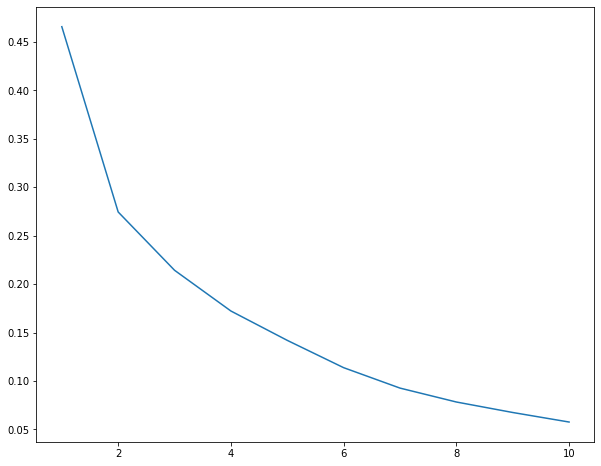

In [0]:
## Training loss
Challenges = ['creator', 'type', 'material']
MODELS = ['VGG19', 'ResNet50', 'EfficientNet']
Training_modes = ['OffTheShelf', 'FineTuning']
for challenge in Challenges:
  fig = 'fig_'+challenge
  fig = plt.figure(figsize=(10,8))
  for MODEL in MODELS:
    for training_mode in Training_modes:
      CHECKPOINT_PATH_full=CHECKPOINT_PATH+challenge+'/'+MODEL+'_'+training_mode+'_Rijks_'+challenge+'.pth'
      checkpoint = torch.load(CHECKPOINT_PATH_full)
      train_losses = checkpoint['avg_train_losses']
      plt.plot(range(1,len(train_losses)+1), train_losses, label=MODEL+'_'+training_mode)
  plt.title(challenge)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

      



In [0]:
## Validation loss
Challenges = ['creator', 'type', 'material']
MODELS = ['VGG19', 'ResNet50', 'EfficientNet']
Training_modes = ['OffTheShelf', 'FineTuning']
for challenge in Challenges:
  fig = 'fig_'+challenge
  fig = plt.figure(figsize=(10,8))
  for MODEL in MODELS:
    for training_mode in Training_modes:
      CHECKPOINT_PATH_full=CHECKPOINT_PATH+challenge+'/'+MODEL+'_'+training_mode+'_Rijks_'+challenge+'.pth'
      checkpoint = torch.load(CHECKPOINT_PATH_full)
      val_losses = checkpoint['avg_val_losses']
      plt.plot(range(1,len(val_losses)+1), val_losses, label=MODEL+'_'+training_mode)
  plt.title(challenge)
  plt.xlabel('Epochs')
  plt.ylabel('Validation Loss')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()

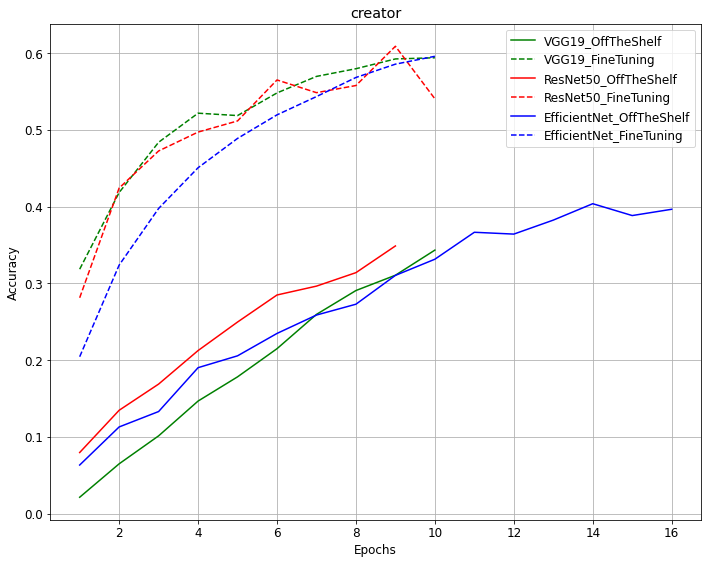

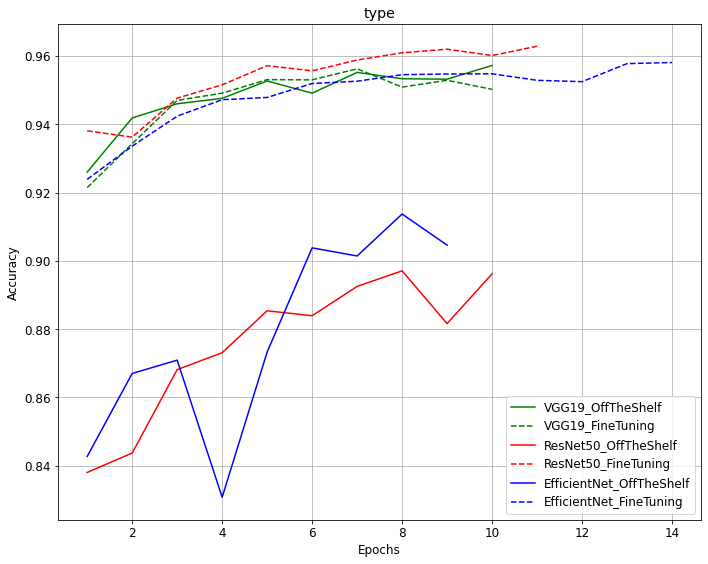

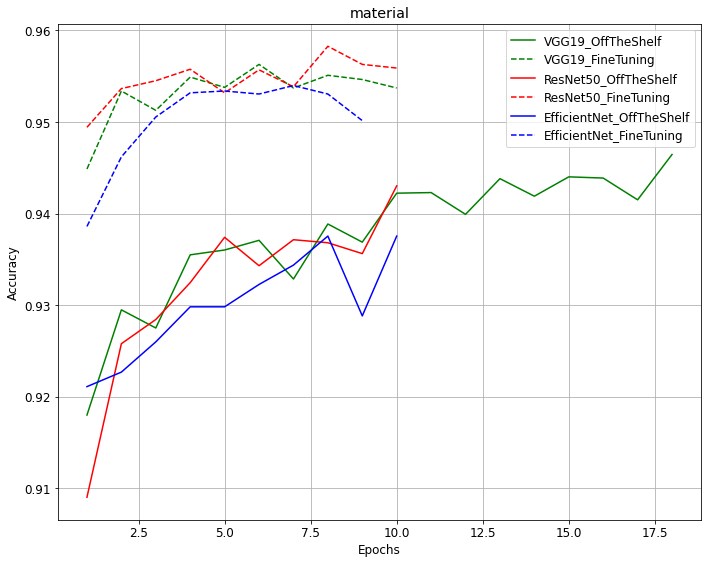

In [14]:
## Accuracy loss
Challenges = ['creator', 'type', 'material']
MODELS = ['VGG19', 'ResNet50', 'EfficientNet']
Training_modes = ['OffTheShelf', 'FineTuning']
for challenge in Challenges:
  fig = 'fig_'+challenge
  pointer=0
  fig = plt.figure(figsize=(10,8))
  for MODEL in MODELS:
    for training_mode in Training_modes:
      CHECKPOINT_PATH_full=CHECKPOINT_PATH+challenge+'/'+MODEL+'_'+training_mode+'_Rijks_'+challenge+'.pth'
      checkpoint = torch.load(CHECKPOINT_PATH_full)
      accuracy = checkpoint['accuracy']
      plt.plot(range(1,len(accuracy)+1), accuracy, color=colours[pointer], linestyle=linestyles[pointer], label=MODEL+'_'+training_mode)
      pointer=pointer+1
  plt.title(challenge)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()